In [135]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('AirPassengers.csv')
data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [136]:
data.shape

(144, 2)

<Axes: xlabel='Month'>

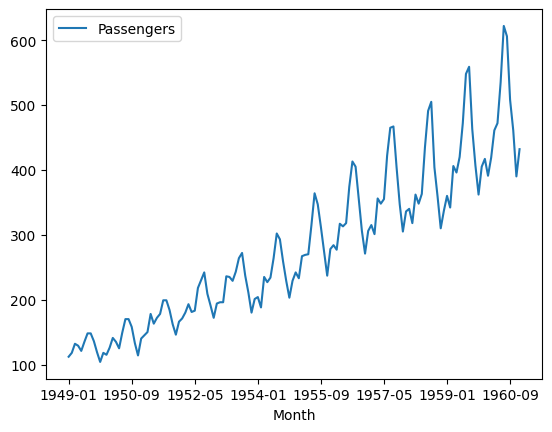

In [137]:
data.plot(x="Month", y="Passengers")

In [138]:
training_data = data.iloc[:115, 1:2].values
test_data = data.iloc[115:, 1:2]

In [139]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range = (0,1))
training_set_scaled = scaler.fit_transform(training_data)

x_train = []
y_train = []
x = 5

for i in range(x, 115):
    x_train.append(training_set_scaled[i-x:i, 0])
    y_train.append(training_set_scaled[1,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [140]:
x_train.shape

(110, 5, 1)

In [141]:
x_train_new = np.reshape(x_train, (110,5))
x_train_new

array([[0.02067183, 0.03617571, 0.07235142, 0.06459948, 0.04392765],
       [0.03617571, 0.07235142, 0.06459948, 0.04392765, 0.08010336],
       [0.07235142, 0.06459948, 0.04392765, 0.08010336, 0.11369509],
       [0.06459948, 0.04392765, 0.08010336, 0.11369509, 0.11369509],
       [0.04392765, 0.08010336, 0.11369509, 0.11369509, 0.08268734],
       [0.08010336, 0.11369509, 0.11369509, 0.08268734, 0.03875969],
       [0.11369509, 0.11369509, 0.08268734, 0.03875969, 0.        ],
       [0.11369509, 0.08268734, 0.03875969, 0.        , 0.03617571],
       [0.08268734, 0.03875969, 0.        , 0.03617571, 0.02842377],
       [0.03875969, 0.        , 0.03617571, 0.02842377, 0.05684755],
       [0.        , 0.03617571, 0.02842377, 0.05684755, 0.09560724],
       [0.03617571, 0.02842377, 0.05684755, 0.09560724, 0.08010336],
       [0.02842377, 0.05684755, 0.09560724, 0.08010336, 0.05426357],
       [0.05684755, 0.09560724, 0.08010336, 0.05426357, 0.11627907],
       [0.09560724, 0.08010336, 0.

In [142]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
modelknn=neigh.fit(x_train_new, y_train)

In [143]:
dataset_train = data.iloc[:115, 1:2]
dataset_test = data.iloc[115:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 5:].values
inputs = inputs.reshape(-1,1)

In [144]:
inputs =scaler.fit_transform(inputs)
X_test = []
for i in range(5, 30):
    X_test.append(inputs[i-5:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [145]:
X_test.shape
X_test

array([[[0.16666667],
        [0.12179487],
        [0.16987179],
        [0.40064103],
        [0.58012821]],

       [[0.12179487],
        [0.16987179],
        [0.40064103],
        [0.58012821],
        [0.625     ]],

       [[0.16987179],
        [0.40064103],
        [0.58012821],
        [0.625     ],
        [0.30128205]],

       [[0.40064103],
        [0.58012821],
        [0.625     ],
        [0.30128205],
        [0.15705128]],

       [[0.58012821],
        [0.625     ],
        [0.30128205],
        [0.15705128],
        [0.        ]],

       [[0.625     ],
        [0.30128205],
        [0.15705128],
        [0.        ],
        [0.08653846]],

       [[0.30128205],
        [0.15705128],
        [0.        ],
        [0.08653846],
        [0.16025641]],

       [[0.15705128],
        [0.        ],
        [0.08653846],
        [0.16025641],
        [0.1025641 ]],

       [[0.        ],
        [0.08653846],
        [0.16025641],
        [0.1025641 ],
        [0.30769

In [146]:
x_test_new = np.reshape(X_test, (25, 5))
x_test_new

array([[0.16666667, 0.12179487, 0.16987179, 0.40064103, 0.58012821],
       [0.12179487, 0.16987179, 0.40064103, 0.58012821, 0.625     ],
       [0.16987179, 0.40064103, 0.58012821, 0.625     , 0.30128205],
       [0.40064103, 0.58012821, 0.625     , 0.30128205, 0.15705128],
       [0.58012821, 0.625     , 0.30128205, 0.15705128, 0.        ],
       [0.625     , 0.30128205, 0.15705128, 0.        , 0.08653846],
       [0.30128205, 0.15705128, 0.        , 0.08653846, 0.16025641],
       [0.15705128, 0.        , 0.08653846, 0.16025641, 0.1025641 ],
       [0.        , 0.08653846, 0.16025641, 0.1025641 , 0.30769231],
       [0.08653846, 0.16025641, 0.1025641 , 0.30769231, 0.27564103],
       [0.16025641, 0.1025641 , 0.30769231, 0.27564103, 0.3525641 ],
       [0.1025641 , 0.30769231, 0.27564103, 0.3525641 , 0.51923077],
       [0.30769231, 0.27564103, 0.3525641 , 0.51923077, 0.76282051],
       [0.27564103, 0.3525641 , 0.51923077, 0.76282051, 0.79807692],
       [0.3525641 , 0.51923077, 0.

In [147]:
predicted_passenger = modelknn.predict(x_test_new)
print(predicted_passenger)
predicted_passenger = predicted_passenger.reshape(-1,1)
prediksi= scaler.fit_transform(predicted_passenger)
dataset_test=dataset_test.iloc[0:25]
dataset_test.shape
# print(prediksi)

[0.03617571 0.03617571 0.03617571 0.03617571 0.03617571 0.03617571
 0.03617571 0.03617571 0.03617571 0.03617571 0.03617571 0.03617571
 0.03617571 0.03617571 0.03617571 0.03617571 0.03617571 0.03617571
 0.03617571 0.03617571 0.03617571 0.03617571 0.03617571 0.03617571
 0.03617571]


(25, 1)

In [148]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(dataset_test, prediksi)

1.0

In [149]:
dataset_test=dataset_test.to_numpy()
dataset_test

array([[505],
       [404],
       [359],
       [310],
       [337],
       [360],
       [342],
       [406],
       [396],
       [420],
       [472],
       [548],
       [559],
       [463],
       [407],
       [362],
       [405],
       [417],
       [391],
       [419],
       [461],
       [472],
       [535],
       [622],
       [606]])

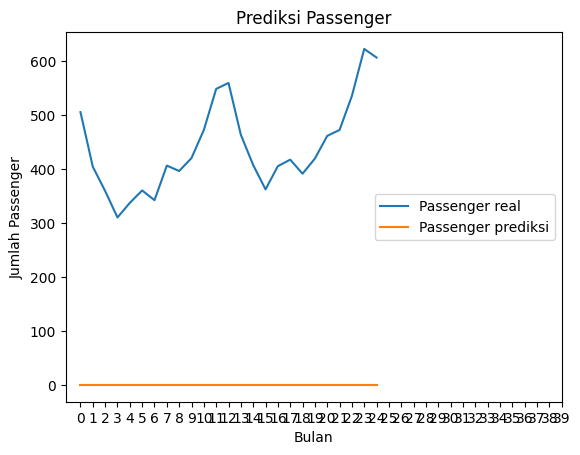

In [150]:
import matplotlib.pyplot as plt
plt.plot(dataset_test,label = 'Passenger real')
plt.plot(prediksi,label = 'Passenger prediksi')
plt.xticks(np.arange(0,40,1))
plt.title('Prediksi Passenger')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Passenger')
plt.legend()
plt.show()

plt.show()